# Raw Python Model

<br>

### Definition

Inputs - 784;
<br>
First Hidden Layer - 30 units;
<br>
Output Layer - 10 units;

Learning Rate - 3.0;
<br>
Epochs - 50;
<br>
Batch Size - 10;
<br>
Regularization - 5.0;
<br>
Training Data Examples - 50 000;
<br>
Validation Data Examples - 10 000;
<br>
Test Data Examples - 10 000;

This model was built using Raw Python.

The weights and biases were initialized randomly and a regularization factor was used when updating the weights and biases.

<br>

### Results

The model took 15min 24s to train without Validation Data and 16min 17s with Validation Data, both over 50 epochs, and, as such, this model was train over a total of 100 epochs.

The final accuracy was 91.76% and 91.75% for the Training and Validation Data Sets, respectively, and the loss was 0.58 and 0.58, again, respectively to the Training and Validation Data Sets.

As for the performance on the Test Data Set, the results were 92.04% for the accuracy and 0.57 for the loss, virtually the same as with the Validation Data Set performance. Below there are some images of some examples where the model failed to correctly classify digits. Its possible to see that some digits would be hard to classify even for humans, although some of them, at least to my human eye, seem easily classifiable. The lack of difference in the accuracy between the Training Data Set and the Validation / Test Data Sets seems to indicate that the parameters were correctly picked for this model and data; although very slowly, the model keeps on improving, which might suggest that further training could make the final accuracy and loss more improved.

<br>

### Failed Classification Images

<img src="../screenshots/python-wrong1.png">
<p style="text-align:center">Image 1 - Actual Value = 4.</p>
<p style="text-align:center">Image 1 - Model Prediction = 6.</p>

<br>

<img src="../screenshots/python-wrong2.png">

<p style="text-align:center">Image 2 - Actual Value = 7.</p>
<p style="text-align:center">Image 2 - Model Prediction = 2.</p>

<br>

<img src="../screenshots/python-wrong3.png">
<p style="text-align:center">Image 3 - Actual Value = 9.</p>
<p style="text-align:center">Image 3 - Model Prediction = 4.</p>

In [1]:
# IMPORTS
import numpy as numpy
from sklearn.model_selection import train_test_split
import model as m
import matplotlib.pyplot as pyplot
from PIL import Image

In [2]:
# CONSTANTS
X_DATA_TRAIN = '../models/data/digit_xtrain.csv'
X_DATA_TEST = '../models/data/digit_xtest.csv'
Y_DATA_TRAIN = '../models/data/digit_ytrain.csv'
Y_DATA_TEST = '../models/data/digit_ytest.csv'

In [3]:
%%time


# IMPORT DATA
yTrain = numpy.loadtxt(Y_DATA_TRAIN, delimiter = ',', dtype = int)
yTest = numpy.loadtxt(Y_DATA_TEST, delimiter = ',', dtype = int)
xTrain = numpy.loadtxt(X_DATA_TRAIN, delimiter = ',', dtype = int)
xTest = numpy.loadtxt(X_DATA_TEST, delimiter = ',', dtype = int)

CPU times: user 55.9 s, sys: 2.19 s, total: 58.1 s
Wall time: 58.3 s


In [4]:
# DATA PROCESSING


# normalize
xTrain = xTrain / 255.0
xTest = xTest / 255.0


# one-hot enconding
yTrain = numpy.eye(10)[yTrain]
yTest = numpy.eye(10)[yTest]


# get a validation set
xTrain, xValidation, yTrain, yValidation = train_test_split(xTrain, yTrain, test_size = 0.17, random_state = 42)


# process data to fit model
# transpose and expand dimensions
# what is passed to the model is a tuple containing the x and the y
trainData = [(numpy.expand_dims(a.transpose(), axis = 1), numpy.expand_dims(b.transpose(), axis = 1))
         for a, b in zip(xTrain, yTrain)]
validationData = [(numpy.expand_dims(a.transpose(), axis = 1), numpy.expand_dims(b.transpose(), axis = 1))
         for a, b in zip(xValidation, yValidation)]
testData = [(numpy.expand_dims(a.transpose(), axis = 1), numpy.expand_dims(b.transpose(), axis = 1))
         for a, b in zip(xTest, yTest)]

In [5]:
%%time


# IMPORT AND TRAIN MODEL
model = m.PerceptronNetwork([784, 30, 10])
model.train(trainData)
model.saveModel('../models/python-model/saved-model/')

Epoch: 0

TRAIN DATA
Accuracy: 45.76
Cost: 3.14

-----------

Epoch: 1

TRAIN DATA
Accuracy: 57.75
Cost: 2.99

-----------

Epoch: 2

TRAIN DATA
Accuracy: 63.78
Cost: 2.82

-----------

Epoch: 3

TRAIN DATA
Accuracy: 66.78
Cost: 2.64

-----------

Epoch: 4

TRAIN DATA
Accuracy: 71.4
Cost: 2.46

-----------

Epoch: 5

TRAIN DATA
Accuracy: 73.21
Cost: 2.3

-----------

Epoch: 6

TRAIN DATA
Accuracy: 75.21
Cost: 2.16

-----------

Epoch: 7

TRAIN DATA
Accuracy: 76.48
Cost: 2.03

-----------

Epoch: 8

TRAIN DATA
Accuracy: 77.95
Cost: 1.92

-----------

Epoch: 9

TRAIN DATA
Accuracy: 78.98
Cost: 1.82

-----------

Epoch: 10

TRAIN DATA
Accuracy: 79.42
Cost: 1.74

-----------

Epoch: 11

TRAIN DATA
Accuracy: 80.36
Cost: 1.66

-----------

Epoch: 12

TRAIN DATA
Accuracy: 81.55
Cost: 1.59

-----------

Epoch: 13

TRAIN DATA
Accuracy: 82.12
Cost: 1.53

-----------

Epoch: 14

TRAIN DATA
Accuracy: 82.53
Cost: 1.48

-----------

Epoch: 15

TRAIN DATA
Accuracy: 83.15
Cost: 1.42

-----------

Epoc

In [6]:
%%time


# SECOND TRAINING ROUND WITH VALIDATION DATA
model.train(trainData, validationData = validationData)
model.saveModel('../models/python-model/saved-model/')

Epoch: 0

TRAIN DATA
Accuracy: 90.0
Cost: 0.77

VALIDATION DATA
Accuracy: 89.93
Cost: 0.77

-----------

Epoch: 1

TRAIN DATA
Accuracy: 90.07
Cost: 0.76

VALIDATION DATA
Accuracy: 90.0
Cost: 0.76

-----------

Epoch: 2

TRAIN DATA
Accuracy: 90.14
Cost: 0.75

VALIDATION DATA
Accuracy: 90.06
Cost: 0.75

-----------

Epoch: 3

TRAIN DATA
Accuracy: 90.21
Cost: 0.75

VALIDATION DATA
Accuracy: 90.11
Cost: 0.75

-----------

Epoch: 4

TRAIN DATA
Accuracy: 90.24
Cost: 0.74

VALIDATION DATA
Accuracy: 90.16
Cost: 0.74

-----------

Epoch: 5

TRAIN DATA
Accuracy: 90.29
Cost: 0.74

VALIDATION DATA
Accuracy: 90.22
Cost: 0.74

-----------

Epoch: 6

TRAIN DATA
Accuracy: 90.35
Cost: 0.73

VALIDATION DATA
Accuracy: 90.2
Cost: 0.73

-----------

Epoch: 7

TRAIN DATA
Accuracy: 90.4
Cost: 0.72

VALIDATION DATA
Accuracy: 90.25
Cost: 0.72

-----------

Epoch: 8

TRAIN DATA
Accuracy: 90.43
Cost: 0.72

VALIDATION DATA
Accuracy: 90.26
Cost: 0.72

-----------

Epoch: 9

TRAIN DATA
Accuracy: 90.49
Cost: 0.71

V

In [7]:
# MODEL TESTING
accuracy = model.evaluateAccuracy(testData)
cost = model.evaluateCost(testData)
wrongPredictionsIndexes = [(numpy.argmax(model.feedForward(x)), y) for (x, y) in testData]
print(f'Accuracy on Test Data: {round(accuracy * 100, 2)}')
print(f'Cost on Test Data: {round(cost, 2)}')

Accuracy on Test Data: 92.04
Cost on Test Data: 0.57


Model Prediction: 6
Actual Number: 5



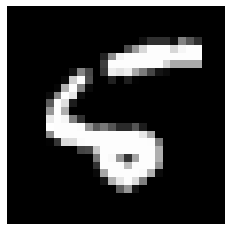


##########


Model Prediction: 6
Actual Number: 4



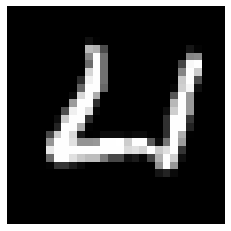


##########


Model Prediction: 2
Actual Number: 3



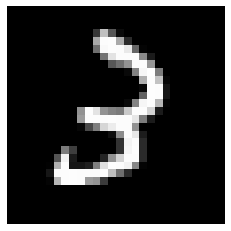


##########


Model Prediction: 7
Actual Number: 2



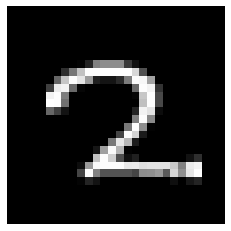


##########


Model Prediction: 4
Actual Number: 9



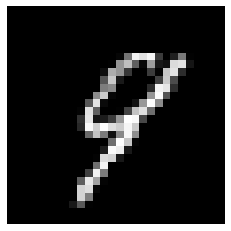


##########


Model Prediction: 4
Actual Number: 7



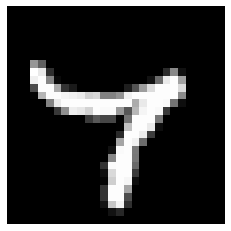


##########


Model Prediction: 9
Actual Number: 2



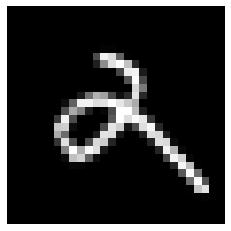


##########


Model Prediction: 4
Actual Number: 9



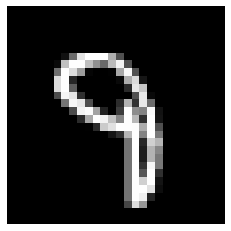


##########


Model Prediction: 7
Actual Number: 5



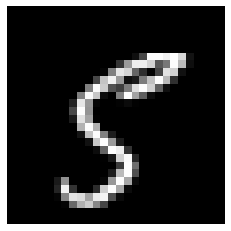


##########


Model Prediction: 5
Actual Number: 6



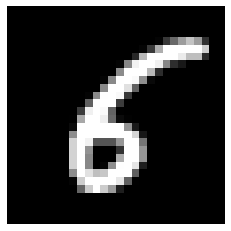


##########




In [8]:
# SHOW FIRST TEN WRONG PREDICTIONS
counter = 0
for index in range(len(wrongPredictionsIndexes)):
    
    
    # get model prediction and actual number
    modelPrediction = wrongPredictionsIndexes[index][0]
    actualNumber = numpy.argmax(wrongPredictionsIndexes[index][1])
    
    
    # display image if prediction is wrong
    if modelPrediction != actualNumber:
        counter += 1
        print(f'Model Prediction: {modelPrediction}')
        print(f'Actual Number: {actualNumber}\n')
        image = xTest[index].reshape(28, 28)
        pyplot.imshow(image)
        pyplot.gray()
        pyplot.axis('off')
        pyplot.show()
        print('\n##########\n\n')
    if counter > 9:
        break

In [9]:
# LOAD
newModel = m.PerceptronNetwork.loadModel('../models/python-model/saved-model/model1629.json')


# QC
print(f'Saved Model Biases:\n{model.biases[1]}\n')
print(f'Loaded Model Biases:\n{newModel.biases[1]}\n')

Model loaded from -> ../models/python-model/saved-model/model1629.json
Saved Model Biases:
[[-0.18288892]
 [-0.83550053]
 [-1.2164119 ]
 [-1.67939229]
 [-1.39573193]
 [ 1.3188809 ]
 [-1.08290114]
 [ 0.96188794]
 [-0.96791251]
 [-1.36885407]]

Loaded Model Biases:
[[-1.71578372]
 [-0.88311584]
 [-0.62514528]
 [ 0.56268572]
 [-0.46691511]
 [-2.57870318]
 [-1.56227241]
 [-0.17330245]
 [-1.35186316]
 [-1.58592456]]

